# Modeling Distributions

### Introduction

Now so far, we have seen how we can learn about a variable by plotting either a frequency distribution, and exploring summary statistics, or exploring the same information with a sample from the population.

As we mentioned, in most circumstances, using a sample of the population is the best that we can do, as it is simply too costly to survey the entire population.  As we'll see in this lesson, just using a sample of the population can lead us to some illogical conclusions, so instead we prefer to use the sample, to build a model of what we believe to be the distribution.

### Loading the data

Now remember, when working with real data, we only have a *sample* of that data, not the underlying population, so let's start with a sample.

If we know the number of rows in our csv file (and here we do), we can read the csv file only selecting 100 random rows.

In [119]:
from numpy.random import default_rng, seed
seed(3)
rng = default_rng()
numbers = rng.choice(range(1, 497), size=396, replace=False)

In [120]:
numbers = sorted(numbers)

In [121]:
import pandas as pd 
sample_df = pd.read_csv('./nba_players_clean.csv', skiprows = numbers, 
                        index_col = 0, header=0)

In [122]:
sample_df.shape

(100, 17)

In [123]:
sample_df[:3]

,player_id,name,weight,birth_date,height,nationality,team_abbreviation,most_recent_season,box_plus_minus,games_played,games_started,player_efficiency_rating,three_point_percentage,true_shooting_percentage,two_point_attempts,two_point_percentage,two_pointers
8,porzikr01,Kristaps Porziņģis,240,1995-08-02,87,Latvia,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,caulewi01,Willie Cauley-Stein,240,1993-08-18,84,United States of America,TOT,2019.0,0.1,349.0,238.0,17.0,0.211,0.559,2617.0,0.541,1417.0
14,kiddgmi01,Michael Kidd-Gilchrist,232,1993-09-26,78,United States of America,TOT,2019.0,-1.8,442.0,356.0,13.5,0.272,0.524,2976.0,0.481,1431.0


### Exploring the data

Ok, now let's take a look at the mean and standard deviation.

In [128]:
height = sample_df['height']

In [132]:
height.max()

89

In [133]:
height.min()

71

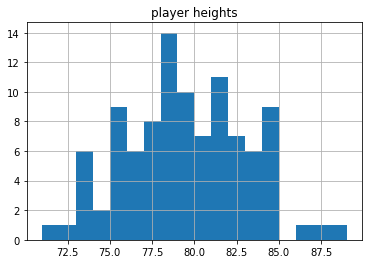

In [134]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('player heights')
height.hist(ax = ax, bins = 18)

Now the above graph plots the 

but we tend to not really believe it.

Instead, we have some off the shelf distributions that we can use, based on both what we observe in the sample, and what we know about the underlying process that produces the variation in our variable.  

In this case, we can take information from our sample, above and use it to create a normal distribution with mean equal to the sample mean, and standard deviation equal to the sample standard devation.

In [136]:
height.mean()

78.99

In [137]:
height.std()

3.583054957474533

In [166]:
import scipy.stats as stats
norm_nba_heights = stats.norm(79, 3.58)

In [170]:
x = np.linspace(norm_nba_heights.ppf(0.01), norm_nba_heights.ppf(0.99), 100)
pdf_nums = norm.pdf(x, loc=height.mean(), scale=height.std())

Then we can plot this distribution.

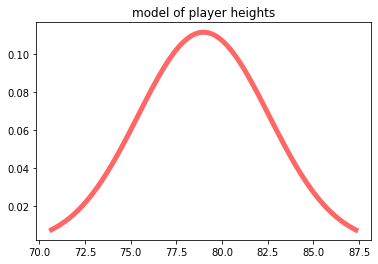

In [175]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('model of player heights')
ax.plot(x, pdf_nums,
'r-', lw=5, alpha=0.6, label='norm pdf')

In [204]:
idcs = height.value_counts().index.argsort()
idcs

array([16, 12,  9, 11,  4, 10,  5,  0,  2,  7,  1,  6,  8,  3, 15, 14, 13])

In [213]:
freq_dist = height.value_counts(normalize = True).iloc[idcs]

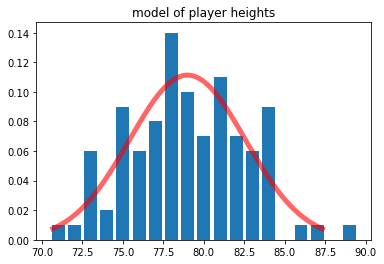

In [219]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('model of player heights')
ax.bar(freq_dist.index, freq_dist.values)
ax.plot(x, pdf_nums,
'r-', lw=5, alpha=0.6, label='norm pdf')

### PDF and CDF